<a href="https://colab.research.google.com/github/PranshuGhori/ClassificationPython/blob/main/pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np

In [16]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

In [17]:
# Targets (apples, oranges)
targets = np.array([[56, 70],
                    [81, 101],
                    [119, 133],
                    [22, 37],
                    [103, 119]], dtype='float32')

In [18]:
# Convert inputs and targets to tensors
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [19]:
w = torch.randn(2,3,requires_grad=True)
b = torch.randn(2,requires_grad=True)

In [20]:
def model(X):
  return X @ w.t() + b

In [21]:
preds = model(inputs)

In [22]:
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

In [23]:
def mse(t1,t2):
  diff = t1-t2
  return torch.sum(diff*diff)/diff.numel()


In [12]:
loss = mse(preds,targets)
loss.backward

<bound method Tensor.backward of tensor(7789.3252, grad_fn=<DivBackward0>)>

In [13]:
with torch.no_grad():
  w -= w.grad * 1e-5
  b -= b.grad * 1e-5

TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'

In [14]:
w.grad.zero_()
b.grad.zero_()
print(w.grad)
print(b.grad)

AttributeError: 'NoneType' object has no attribute 'zero_'

In [15]:
preads = model(inputs)
preads

tensor([[-23.3319,  38.0617],
        [-22.0930,  63.2583],
        [-72.6053, 120.1583],
        [ -8.3549, -33.0814],
        [-22.0690, 105.7906]], grad_fn=<AddBackward0>)

In [ ]:
loss = mse(preds, targets)
loss

In [24]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [25]:
dataset = MNIST(root='data/', download=True)

100%|██████████| 9.91M/9.91M [00:01<00:00, 6.24MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 165kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.55MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 3.94MB/s]


In [26]:
len(dataset)

60000

In [27]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [28]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 7


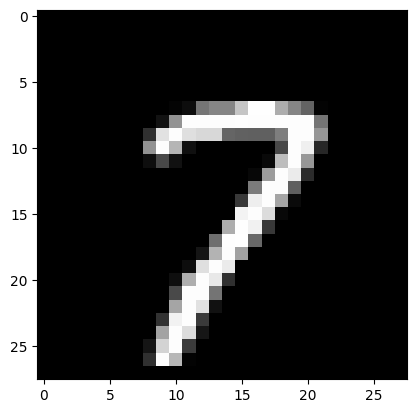

In [30]:
image, label = dataset[230]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [31]:
import torchvision.transforms as transforms
dataset = MNIST(root='data/',
                train=True,
                transform=transforms.ToTensor())

In [32]:
img_tensor, label = dataset[0]


In [33]:
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [34]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


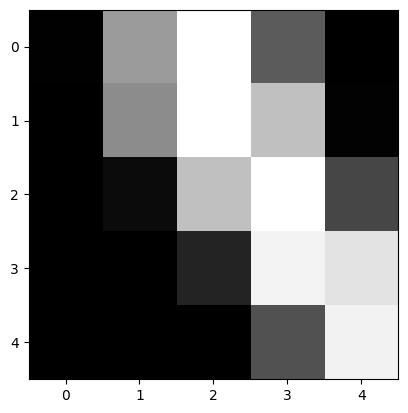

In [35]:
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray')

Training and Validation

In [36]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [37]:
from torch.utils.data import DataLoader
batch_size = 128
train_loader = DataLoader(train_ds, batch_size = 128, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [38]:
import torch.nn as nn
input_size = 28*28
num_classes = 10

model = nn.Linear(input_size, num_classes)

In [39]:
model.weight

Parameter containing:
tensor([[-0.0041, -0.0079, -0.0217,  ..., -0.0280, -0.0261,  0.0037],
        [-0.0113,  0.0126,  0.0127,  ...,  0.0353,  0.0065, -0.0081],
        [ 0.0138, -0.0278, -0.0258,  ..., -0.0180,  0.0004, -0.0316],
        ...,
        [ 0.0088, -0.0297, -0.0208,  ...,  0.0142, -0.0093,  0.0152],
        [-0.0082, -0.0283, -0.0317,  ..., -0.0256,  0.0293,  0.0323],
        [-0.0344,  0.0069, -0.0272,  ...,  0.0065,  0.0132, -0.0203]],
       requires_grad=True)

In [40]:
model.bias

Parameter containing:
tensor([ 0.0211,  0.0339, -0.0111, -0.0112, -0.0032,  0.0021,  0.0355, -0.0251,
         0.0331,  0.0102], requires_grad=True)

In [41]:
for images, labels in train_loader:
  print(images.shape)

torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([12

In [42]:
for images, labels in train_loader:
    print(images.shape)
    break

torch.Size([128, 1, 28, 28])


In [43]:
images.reshape(128,784).shape

torch.Size([128, 784])

In [44]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)
  def forward(self,xb):
    xb = xb.reshape(-1,784)
    out = self.linear(xb)
    return out


In [45]:
model = MnistModel()
outputs = model(images)
print(outputs.shape)

torch.Size([128, 10])


In [46]:
import torch.nn.functional as F


In [47]:
probs = F.softmax(model(images), dim=1)

In [48]:
print('sample probabilities:\n', probs[:2].data)

sample probabilities:
 tensor([[0.0972, 0.0667, 0.1058, 0.1252, 0.0836, 0.1381, 0.1368, 0.0663, 0.1049,
         0.0754],
        [0.0878, 0.0788, 0.1200, 0.1260, 0.1031, 0.1241, 0.0896, 0.0879, 0.0861,
         0.0966]])


In [49]:
print("Sum: ", torch.sum(probs[0]).item())

Sum:  1.0


In [50]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([5, 3, 8, 3, 3, 3, 2, 2, 4, 6, 2, 3, 2, 3, 5, 2, 5, 6, 5, 3, 6, 6, 3, 9,
        8, 5, 6, 5, 3, 8, 4, 7, 3, 3, 3, 2, 2, 3, 6, 5, 6, 5, 2, 6, 7, 6, 5, 6,
        8, 3, 5, 6, 2, 6, 8, 3, 3, 2, 3, 6, 3, 6, 3, 2, 3, 8, 3, 3, 3, 3, 2, 6,
        7, 6, 2, 3, 3, 6, 2, 3, 4, 3, 3, 6, 5, 3, 3, 3, 6, 7, 2, 3, 2, 2, 6, 6,
        6, 2, 3, 3, 3, 2, 6, 2, 6, 9, 5, 5, 6, 8, 3, 3, 3, 5, 8, 6, 9, 5, 2, 6,
        2, 3, 2, 2, 6, 6, 4, 3])
tensor([0.1381, 0.1260, 0.1305, 0.1478, 0.1460, 0.1332, 0.1510, 0.1178, 0.1179,
        0.1319, 0.1565, 0.1165, 0.1310, 0.1248, 0.1172, 0.1240, 0.1468, 0.1216,
        0.1484, 0.1408, 0.1180, 0.1506, 0.1381, 0.1144, 0.1208, 0.1379, 0.1180,
        0.1175, 0.1296, 0.1251, 0.1264, 0.1231, 0.1456, 0.1430, 0.1182, 0.1240,
        0.1287, 0.1316, 0.1434, 0.1538, 0.1252, 0.1457, 0.1324, 0.1460, 0.1303,
        0.1278, 0.1393, 0.1143, 0.1431, 0.1270, 0.1354, 0.1262, 0.1364, 0.1276,
        0.1478, 0.1414, 0.1190, 0.1445, 0.1576, 0.1260, 0.1429, 0.1307, 0.1248,
       

In [51]:
def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim=1)
  return torch.tensor(torch.sum(preds == labels).item()/len(preds))

In [52]:
accuracy(outputs, labels)

tensor(0.1250)

In [54]:
loss_fn = F.cross_entropy

In [55]:
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3571, grad_fn=<NllLossBackward0>)


In [57]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
  optimizer = opt_func(model.parameters(),lr)
  history = []

  for epoch in range(epochs):

    for batch in train_loader:
      loss = model.training_step(batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    result = evaluate(model, val_loader)
    model.epoch_end(epoch, result)
    history.append(result)

  return history

In [59]:
def evaluate(model, val_loader):
  outputs = [model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)

In [67]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)

  def forward(self,xb):
    xb = xb.reshape(-1,784)
    out = self.linear(xb)
    return out

  def training_step(self, batch):
    images, labels = batch
    out = self(images)
    loss = F.cross_entropy(out, labels)
    return loss

  def validation_step(self, batch):
    images, labels = batch
    out = self(images)
    loss = F.cross_entropy(out, labels)
    acc = accuracy(out, labels)
    return {'val_loss': loss, 'val_acc': acc}

  def validation_epoch_end(self, outputs):
    batch_losses = [x['val_loss'] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean()
    batch_accs = [x['val_acc'] for x in outputs]
    epoch_acc = torch.stack(batch_accs).mean()
    return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

  def epoch_end(self, epoch, result):
    print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val']['val_loss'], result['val']['val_acc']))

model = MnistModel()